<a href="https://colab.research.google.com/github/RidouanBani/CCS_ROMS_DATA/blob/main/ReadROMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this section I will show you how to extract ROMS data (https://oceanmodeling.ucsc.edu/) within specific boundaries that are of interests for the biology of Dungeness crab and that will be used later to build a model that can predict the biomass of Dungeness crab for fishery puposes.

ROMS uses 8-day overlapping analysis cycles spanning the period 1980-2011. The start date of each cycle corresponds to day 4 (the mid-point) of the previous cycle, and the prior circulation estimate (also referred to as the background) is taken to be the posterior (also referred to as the analysis) from the previous assimilation cycle on day 4. 

The ROMS model domain covers the region 30°N–48°N (181)and from the coast to 134°W at 0.1° (186) (~10 km) horizontal resolution, with 42 terrain-following vertical levels.

Because we want the data to be by average over four day and by state, region , and Dungeness crab life cycle (16 x 186 x 42 x 181 x 186).

The following is the grid coordoniate for Longetude and Latitude per region, state, and life cycle.

In [23]:
!pip install pandas
!pip install matplotlib
!pip install pydap
!pip install siphon
!pip install netCDF4

     |████████████████████████████████| 4.7MB 4.3MB/s 
     |████████████████████████████████| 327kB 47.0MB/s 


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydap.client import open_url
from pydap.cas.urs import setup_session
from siphon.catalog import TDSCatalog
from siphon import catalog, ncss

In [12]:
WA_grid=[[[163,94],[165,101]],
         [[165,93],[166,101]],
         [[166,91],[168,101]],
         [[168,90],[169,101]],
         [[169,90],[171,101]],
         [[171,90],[173,98]],
         [[173,92],[174,98]],
         [[174,92],[175,97]],
         [[175,89],[178,97]],
         [[178,87],[180,95]]]
WA_grid_LS=[[[163,98],[169,100]],
         [[169,97],[173,99]],
         [[173,95],[178,97]],
         [[178,93],[180,95]]]
OR_grid=[[[120,93],[122,97]],         
         [[122,92],[127,96]],                
         [[127,91],[129,95]],         
         [[129,91],[132,96]],         
         [[132,92],[134,96]],         
         [[134,92],[135,97]],         
         [[135,93],[138,98]],         
         [[138,90],[144,99]],         
         [[144,91],[150,100]],
         [[150,92],[151,100]],
         [[151,93],[154,101]],
         [[154,92],[161,101]],
         [[161,93],[163,101]]]
OR_grid_LS=[[[120,95],[122,97]],         
         [[122,95],[127,96]],                
         [[127,94],[129,95]],         
         [[129,94],[132,96]],         
         [[132,95],[134,96]],         
         [[134,96],[135,97]],         
         [[135,97],[138,98]],         
         [[138,98],[144,99]],         
         [[144,99],[151,100]],
         [[151,99],[163,101]]]
NCA_grid=[[[88,100],[89,104]],         
         [[89,99],[90,103]],                
         [[90,100],[91,103]],         
         [[91,99],[93,103]],         
         [[93,99],[98,102]],          
         [[98,98],[99,101]],         
         [[99,97],[100,100]],         
         [[100,96],[101,99]],          
         [[101,95],[102,98]],
         [[102,92],[103,97]],
         [[103,95],[104,97]],
         [[104,93],[105,96]],
         [[105,93],[106,96]],
         [[106,94],[107,97]],
         [[107,94],[108,98]],
         [[108,94],[110,99]],
         [[110,95],[113,99]],
         [[113,94],[116,100]],
         [[116,94],[120,99]]]
NCA_grid_LS=[[[88,103],[89,104]],         
         [[89,102],[90,103]],                
         [[90,101],[93,103]],                
         [[93,101],[98,102]],          
         [[98,100],[99,101]],         
         [[99,99],[100,100]],         
         [[100,98],[101,99]],          
         [[101,97],[102,98]],
         [[102,96],[104,97]],
         [[104,95],[106,96]],
         [[106,96],[107,97]],
         [[107,97],[108,98]],
         [[108,98],[113,99]],
         [[113,98],[116,100]],
         [[116,97],[120,99]]]
SCA_grid=[[[27,138],[28,139]],
         [[30,136],[32,139]],
         [[33,137],[34,138]],
         [[36,137],[39,142]],
         [[32,141],[35,147]],
         [[28,143],[31,148]],
         [[25,142],[28,145]],
         [[25,146],[28,150]],
         [[27,153],[31,157]],
         [[25,159],[29,163]],
         [[25,165],[32,169]],
         [[32,163],[34,166]],
         [[32,152],[36,159]],
         [[33,147],[38,151]],
         [[34,157],[37,163]],
         [[37,153],[39,156]],
         [[39,134],[41,156]],
         [[41,133],[44,148]],
         [[44,132],[45,145]],
         [[45,131],[46,135]],
         [[47,125],[51,128]],
         [[46,129],[52,134]],   
         [[52,127],[55,131]],
         [[55,126],[56,130]],
         [[56,124],[58,128]],
         [[58,124],[59,126]],
         [[59,123],[61,125]],
         [[61,122],[62,124]],         
         [[62,119],[63,123]],                
         [[63,119],[66,121]],         
         [[66,119],[67,120]],         
         [[67,120],[68,122]],          
         [[68,118],[69,122]],         
         [[69,115],[70,122]],         
         [[70,113],[71,118]],          
         [[71,111],[72,117]],
         [[72,110],[75,116]],
         [[75,109],[77,115]],
         [[77,107],[78,115]],
         [[78,106],[79,115]],
         [[79,105],[80,113]],
         [[80,105],[83,111]],
         [[83,104],[84,110]],
         [[84,103],[85,109]],
         [[85,102],[86,107]],
         [[86,102],[87,106]],
         [[87,101],[88,105]]]
SCA_grid_LS=[[[27,138],[28,139]],
         [[30,136],[32,139]],
         [[33,137],[34,138]],
         [[36,137],[39,142]],
         [[32,141],[35,147]],
         [[28,143],[31,148]],
         [[25,142],[28,145]],
         [[25,146],[28,150]],
         [[27,153],[31,157]],
         [[25,159],[29,163]],
         [[25,165],[32,169]],
         [[32,163],[34,166]],
         [[32,152],[36,159]],
         [[33,147],[38,151]],
         [[34,157],[37,163]],
         [[37,153],[39,156]],
         [[39,134],[41,156]],
         [[41,146],[44,148]],
         [[44,134],[45,145]],
         [[45,133],[46,135]],
         [[47,125],[51,128]],
         [[46,132],[52,134]],   
         [[52,130],[55,131]],
         [[55,128],[56,130]],
         [[56,126],[58,128]],
         [[58,124],[59,126]],
         [[59,123],[61,125]],
         [[61,122],[62,124]],         
         [[62,121],[63,123]],                
         [[63,120],[66,121]],         
         [[66,120],[67,122]],         
         [[67,121],[68,122]],          
         [[68,121],[69,122]],         
         [[69,118],[70,122]],         
         [[70,117],[71,118]],      
         [[71,116],[72,117]],
         [[72,115],[75,116]],
         [[75,114],[77,115]],
         [[77,114],[78,115]],
         [[78,113],[79,115]],
         [[79,111],[80,113]],
         [[80,109],[83,111]],
         [[83,109],[84,110]],
         [[84,108],[85,109]],
         [[85,106],[86,107]],
         [[86,105],[87,106]],
         [[87,104],[88,105]]]
SCA_grid_NISL=[[[25,165],[32,169]],
         [[32,163],[34,166]],
         [[34,157],[37,163]],
         [[37,153],[39,156]],
         [[39,134],[41,156]],
         [[41,133],[44,148]],
         [[44,132],[45,145]],
         [[45,131],[46,135]],
         [[46,129],[52,134]],   
         [[52,127],[55,131]],
         [[55,126],[56,130]],
         [[56,124],[58,128]],
         [[58,124],[59,126]],
         [[59,123],[61,125]],
         [[61,122],[62,124]],         
         [[62,119],[63,123]],                
         [[63,119],[66,121]],         
         [[66,119],[67,103]],         
         [[67,120],[68,122]],          
         [[68,118],[69,122]],         
         [[69,115],[70,122]],         
         [[70,113],[71,118]],          
         [[71,111],[72,117]],
         [[72,110],[75,116]],
         [[75,109],[77,115]],
         [[77,107],[78,115]],
         [[78,106],[79,115]],
         [[79,105],[80,113]],
         [[80,105],[83,111]],
         [[83,104],[84,110]],
         [[84,103],[85,109]],
         [[85,102],[86,107]],
         [[86,102],[87,106]],
         [[87,101],[88,105]]]

In [13]:
WA_grid_150 = np.zeros(np.array(WA_grid).shape).tolist()
for i in range(len(WA_grid_150)):
    WA_grid_150[i][0][1] = WA_grid[i][1][1]-15
    WA_grid_150[i][0][0] = WA_grid[i][0][0]
    WA_grid_150[i][1][0] = WA_grid[i][1][0]
    WA_grid_150[i][1][1] = WA_grid[i][1][1]
    

OR_grid_150 = np.zeros(np.array(OR_grid).shape).tolist()
for i in range(len(OR_grid_150)):
    OR_grid_150[i][0][1] = OR_grid[i][1][1]-15
    OR_grid_150[i][0][0] = OR_grid[i][0][0]
    OR_grid_150[i][1][0] = OR_grid[i][1][0]
    OR_grid_150[i][1][1] = OR_grid[i][1][1]
    
    
NCA_grid_150 = np.zeros(np.array(NCA_grid).shape).tolist()
for i in range(len(NCA_grid_150)):
    NCA_grid_150[i][0][1] = NCA_grid[i][1][1]-15
    NCA_grid_150[i][0][0] = NCA_grid[i][0][0]
    NCA_grid_150[i][1][0] = NCA_grid[i][1][0]
    NCA_grid_150[i][1][1] = NCA_grid[i][1][1]
    
    
SCA_grid_150 = np.zeros(np.array(SCA_grid).shape).tolist()
for i in range(len(SCA_grid_150)):
    SCA_grid_150[i][0][1] = SCA_grid[i][1][1]-15
    SCA_grid_150[i][0][0] = SCA_grid[i][0][0]
    SCA_grid_150[i][1][0] = SCA_grid[i][1][0]
    SCA_grid_150[i][1][1] = SCA_grid[i][1][1]
    
WA_grid_250 = np.zeros(np.array(WA_grid).shape).tolist()
for i in range(len(WA_grid_250)):
    WA_grid_250[i][0][1] = WA_grid[i][1][1]-25
    WA_grid_250[i][0][0] = WA_grid[i][0][0]
    WA_grid_250[i][1][0] = WA_grid[i][1][0]
    WA_grid_250[i][1][1] = WA_grid[i][1][1]
    

OR_grid_250 = np.zeros(np.array(OR_grid).shape).tolist()
for i in range(len(OR_grid_250)):
    OR_grid_250[i][0][1] = OR_grid[i][1][1]-25
    OR_grid_250[i][0][0] = OR_grid[i][0][0]
    OR_grid_250[i][1][0] = OR_grid[i][1][0]
    OR_grid_250[i][1][1] = OR_grid[i][1][1]
    
    
NCA_grid_250 = np.zeros(np.array(NCA_grid).shape).tolist()
for i in range(len(NCA_grid_250)):
    NCA_grid_250[i][0][1] = NCA_grid[i][1][1]-25
    NCA_grid_250[i][0][0] = NCA_grid[i][0][0]
    NCA_grid_250[i][1][0] = NCA_grid[i][1][0]
    NCA_grid_250[i][1][1] = NCA_grid[i][1][1]
    
    
SCA_grid_250 = np.zeros(np.array(SCA_grid).shape).tolist()
for i in range(len(SCA_grid_250)):
    SCA_grid_250[i][0][1] = SCA_grid[i][1][1]-25
    SCA_grid_250[i][0][0] = SCA_grid[i][0][0]
    SCA_grid_250[i][1][0] = SCA_grid[i][1][0]
    SCA_grid_250[i][1][1] = SCA_grid[i][1][1]


WC_US_grid=[]
WC_US_grid.append(WA_grid);WC_US_grid.append(OR_grid);WC_US_grid.append(NCA_grid);WC_US_grid.append(SCA_grid);

WC_US_grid_LS=[]
WC_US_grid_LS.append(WA_grid_LS);WC_US_grid_LS.append(OR_grid_LS);WC_US_grid_LS.append(NCA_grid_LS);WC_US_grid_LS.append(SCA_grid_LS);

WC_US_grid_150 = []
WC_US_grid_150.append(WA_grid_150);WC_US_grid_150.append(OR_grid_150);WC_US_grid_150.append(NCA_grid_150);WC_US_grid_150.append(SCA_grid_150);

WC_US_grid_250 = []
WC_US_grid_250.append(WA_grid_250);WC_US_grid_250.append(OR_grid_250);WC_US_grid_250.append(NCA_grid_250);WC_US_grid_250.append(SCA_grid_250);


Funtion for plotting the previous data to give you a sense of what they represent

In [14]:
def plot_grid(WC_US_grid_LS, WC_US_grid, WC_US_grid_150, WC_US_grid_250):
    fig = plt.figure()
    plt.subplot(2, 2,1)

    for r in WC_US_grid_LS:
        for w in r:
            for i in range(w[0][0],w[1][0]):
                for j in range(w[0][1],w[1][1]):
                    y = [Alon[i],Alon[i+1],Alon[i+1],Alon[i],Alon[i]]
                    x = [Alat[j],Alat[j],Alat[j+1],Alat[j+1],Alat[j]]
                    plt.plot(x, y, 'k',linewidth=0.2)
    
    plt.subplot(2, 2,2)

    for r in WC_US_grid:
        for w in r:
            for i in range(w[0][0],w[1][0]):
                for j in range(w[0][1],w[1][1]):
                    y = [Alon[i],Alon[i+1],Alon[i+1],Alon[i],Alon[i]]
                    x = [Alat[j],Alat[j],Alat[j+1],Alat[j+1],Alat[j]]
                    plt.plot(x, y, 'k',linewidth=0.2)
                    
    plt.subplot(2, 2,3)

    for r in WC_US_grid_150:
        for w in r:
            for i in range(w[0][0],w[1][0]):
                for j in range(w[0][1],w[1][1]):
                    y = [Alon[i],Alon[i+1],Alon[i+1],Alon[i],Alon[i]]
                    x = [Alat[j],Alat[j],Alat[j+1],Alat[j+1],Alat[j]]
                    plt.plot(x, y, 'k',linewidth=0.2)
    plt.subplot(2, 2,4)

    for r in WC_US_grid_250:
        for w in r:
            for i in range(w[0][0],w[1][0]):
                for j in range(w[0][1],w[1][1]):
                    y = [Alon[i],Alon[i+1],Alon[i+1],Alon[i],Alon[i]]
                    x = [Alat[j],Alat[j],Alat[j+1],Alat[j+1],Alat[j]]
                    plt.plot(x, y, 'k',linewidth=0.2)
    plt.show()
    return fig

Before plotting, we need the Long and Lat data that follow the same grid, 
Next step is for importing this data

In [18]:
opendap_url = 'https://oceanmodeling.ucsc.edu:8443/thredds/dodsC/wc12.0_ccsra31_01/prior/wc12_ccsra31_fwd_000_20101221_20101229.nc'

dataset = open_url(opendap_url)

lat = dataset['lat_rho']
lon = dataset['lon_rho']
Alat = lon[:,:].data[0,:]
Alon = lat[:,:].data[:,0] 

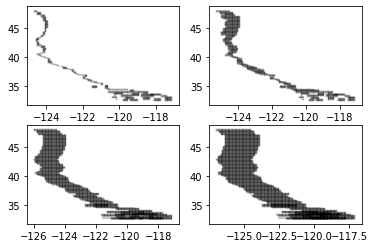

In [19]:
fig1 = plot_grid(WC_US_grid_LS, WC_US_grid, WC_US_grid_150, WC_US_grid_250)

Now you are set to dowload the ROMS variable. In my case I only needed few ones. For example, the sea temperature at bottom layer nearshore in WA, OR, NCA = North CA, and SCA = South California. Because it takes time to extract the whole data, I will do ahead and extract just the 10 first points (first 40 days starting 1980-01-09)

In [25]:
data_url = ('https://oceanmodeling.ucsc.edu:8443/thredds/catalog/wc12.0_ccsra31_01/posterior/catalog.xml')

cat = catalog.TDSCatalog(data_url)
datasets = list(cat.datasets)

WA_BLT_LS=[];  OR_BLT_LS=[]; NCA_BLT_LS=[]; SCA_BLT_LS=[];
WA_TLT_CS=[];  OR_TLT_CS=[]; NCA_TLT_CS=[]; SCA_TLT_CS=[];
WA_TLT_150=[];  OR_TLT_150=[]; NCA_TLT_150=[]; SCA_TLT_150=[];
WA_TLT_250=[];  OR_TLT_250=[]; NCA_TLT_250=[]; SCA_TLT_250=[];
WA_LS_CS=[];  OR_LS_CS=[]; NCA_LS_CS=[]; SCA_LS_CS=[];
WA_LS_150=[];  OR_LS_150=[]; NCA_LS_150=[]; SCA_LS_150=[];
WA_LS_250=[];  OR_LS_250=[]; NCA_LS_250=[]; SCA_LS_250=[];
WA_CS_CS=[];  OR_CS_CS=[]; NCA_CS_CS=[]; SCA_CS_CS=[];
WA_CS_150=[];  OR_CS_150=[]; NCA_CS_150=[]; SCA_CS_150=[];
WA_CS_250=[];  OR_CS_250=[]; NCA_CS_250=[]; SCA_CS_250=[];
for u in datasets[0:10]:
    opendap_url = "https://oceanmodeling.ucsc.edu:8443/thredds/dodsC/wc12.0_ccsra31_01/posterior/"+str(u)
    dataset = open_url(opendap_url)

    Temp = dataset['temp']
    U_momntum = dataset['u']
    V_momntum = dataset['v']
    
    # WA bottom Temperature  in shallow watters 0-10km off-shore 
    T_store =[]
    for ii in WA_grid_LS:
        temp = Temp[0:16,0,ii[0][0]:ii[1][0],ii[0][1]:ii[1][1]]
        T_store+=temp.data.flatten().tolist()
    T_store = np.array(T_store)
    T_store = T_store.astype('float')
    T_store[T_store>50] = np.nan
    WA_BLT_LS.append(np.nanmean(T_store))
    
    # OR bottom Temperature  in shallow watters 0-10km off-shore 
    T_store =[]
    for ii in OR_grid_LS:
        temp = Temp[0:16,1,ii[0][0]:ii[1][0],ii[0][1]:ii[1][1]]
        T_store+=temp.data.flatten().tolist()
    T_store = np.array(T_store)
    T_store = T_store.astype('float')
    T_store[T_store>50] = np.nan
    OR_BLT_LS.append(np.nanmean(T_store))
    
    # NCA bottom Temperature in shallow watters 0-10km off-shore 
    T_store =[]
    for ii in NCA_grid_LS:
        temp = Temp[0:16,1,ii[0][0]:ii[1][0],ii[0][1]:ii[1][1]]
        T_store+=temp.data.flatten().tolist()
    T_store = np.array(T_store)
    T_store = T_store.astype('float')
    T_store[T_store>50] = np.nan
    NCA_BLT_LS.append(np.nanmean(T_store))
    
    # SCA   bottom Temperature in shallow watters 0-10km off-shore 
    T_store =[]
    for ii in SCA_grid_LS:
        temp = Temp[0:16,1,ii[0][0]:ii[1][0],ii[0][1]:ii[1][1]]
        T_store+=temp.data.flatten().tolist()
    T_store = np.array(T_store)
    T_store = T_store.astype('float')
    T_store[T_store>50] = np.nan
    SCA_BLT_LS.append(np.nanmean(T_store))
       


Now let see how it loooks

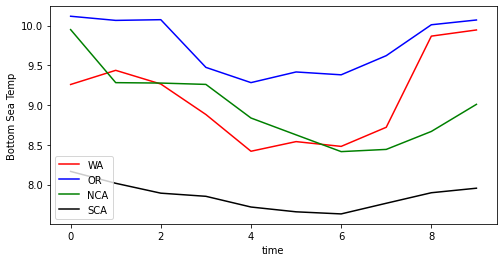

In [28]:
fig = plt.figure(figsize=(8, 4))
plt.plot(WA_BLT_LS, "r", label="WA")
plt.plot(OR_BLT_LS, "b", label="OR")
plt.plot(NCA_BLT_LS, "g", label="NCA")
plt.plot(SCA_BLT_LS, "k", label="SCA")

plt.legend()
plt.xlabel("time")
plt.ylabel("Bottom Sea Temp")
fig.show()